In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
archivo = '../data/metrics/todos.csv'
datos = pd.read_csv(archivo,index_col=0,parse_dates=True)
datos.head()

,Ti_ae,Ti_bm,Ti_ca,Ti_za,Ti,To_esolmet
tiempo,,,,,,
2019-06-09 01:00:00,26.188194,26.628872,26.462325,26.472170,26.650584,24.13
2019-06-09 02:00:00,25.911450,26.383318,26.288043,26.197484,26.652891,23.63
2019-06-09 03:00:00,25.650832,26.114065,26.014926,25.931405,26.454455,23.41
2019-06-09 04:00:00,25.004127,25.728279,25.447787,25.503819,26.014895,22.24
2019-06-09 05:00:00,24.860334,25.492268,25.187682,25.270469,25.513036,22.29


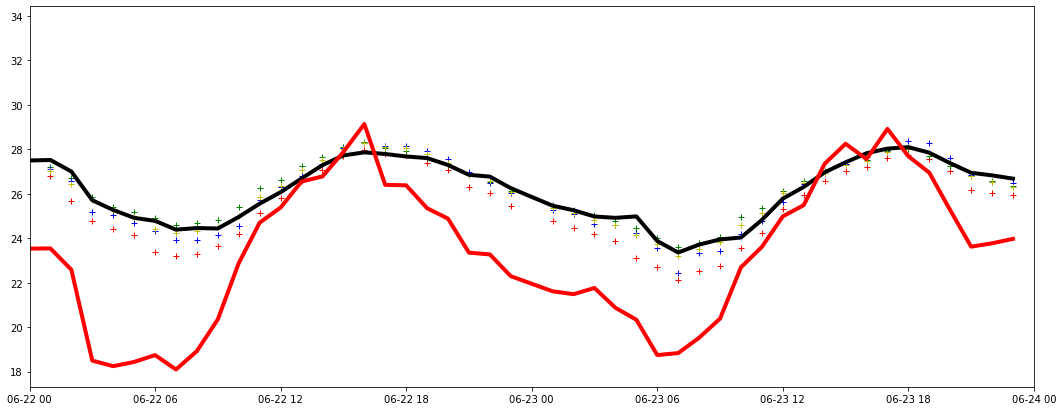

In [4]:
fig, ax = plt.subplots(figsize=(18,7))

fecha1 = parse("2019-06-22")
fecha2 = fecha1 + pd.Timedelta("2D")

ax.set_xlim(fecha1,fecha2)


ax.plot(datos.Ti_ae,'r+')
ax.plot(datos.Ti_bm,'g+')
ax.plot(datos.Ti_ca,'b+')
ax.plot(datos.Ti_za,'y+')

ax.plot(datos.Ti,'k-',linewidth=4)
ax.plot(datos.To_esolmet,'r-',linewidth=4)

In [5]:
datos.columns

Index(['Ti_ae', 'Ti_bm', 'Ti_ca', 'Ti_za', 'Ti', 'To_esolmet'], dtype='object')

# Pearson correlation

In [20]:
datos[['Ti_ae', 'Ti_bm', 'Ti_ca', 'Ti_za','Ti']].corr()
# Si existiera un uno con otro juego de datos quiere decir que son id'enticos
#posible enga~no

,Ti_ae,Ti_bm,Ti_ca,Ti_za,Ti
Ti_ae,1.000000,0.996277,0.995835,0.997703,0.954001
Ti_bm,0.996277,1.000000,0.993435,0.998669,0.960271
Ti_ca,0.995835,0.993435,1.000000,0.996510,0.957310
Ti_za,0.997703,0.998669,0.996510,1.000000,0.958498
Ti,0.954001,0.960271,0.957310,0.958498,1.000000


In [29]:
nombres = ['Ti_ae', 'Ti_bm', 'Ti_ca', 'Ti_za']
for i in nombres:
    print(i,datos.Ti.corr(datos[i]))

Ti_ae 0.9540011361111964
Ti_bm 0.9602713574571723
Ti_ca 0.9573103490796755
Ti_za 0.9584980096244053


# RMSE 

In [45]:
(((datos.Ti_ae - datos.Ti))**2).mean()**.5

0.7016870535423132

In [47]:
for i in nombres:
    print(i,((datos[i] - datos.Ti)**2).mean()**.5)

Ti_ae 0.7016870535423132
Ti_bm 0.7862931616162211
Ti_ca 0.6725802331188333
Ti_za 0.7026474945587221


# Diferencia promedio de la temperatura

In [48]:
(datos.Ti_ae - datos.Ti).mean()

-0.20025024087804089

In [49]:
for i in nombres:
    print(i,(datos[i]-datos.Ti).mean())

Ti_ae -0.20025024087804089
Ti_bm 0.4152522581377036
Ti_ca 0.24457550359105162
Ti_za 0.3117141560570335


# Diferencia promedio de las temperaturas m'aximas diarias

In [54]:
(datos.Ti_ae.resample("1D").max() - datos.Ti.resample("1D").max()).mean()

0.05655108731345582

In [56]:
for i in nombres:
    print(i,(datos[i].resample("1D").max() - datos.Ti.resample("1D").max()).mean())

Ti_ae 0.05655108731345582
Ti_bm 0.17134994230347012
Ti_ca 0.449624437523954
Ti_za 0.2702844070365229


# Diferencia promedio de las temperaturas m'aximas diarias


In [57]:
for i in nombres:
    print(i,(datos[i].resample("1D").min() - datos.Ti.resample("1D").min()).mean())

Ti_ae -0.47078924488300267
Ti_bm 0.6408774360201237
Ti_ca -0.010480818067426512
Ti_za 0.32999102412122827


# Diferencia promedio en el Factor de Decremento

In [74]:
df_s = (datos.Ti_ae.resample("1D").max() - datos.Ti_ae.resample("1D").min()) / (datos.To_esolmet.resample("1D").max() - datos.To_esolmet.resample("1D").min())
df_e = (datos.Ti.resample("1D").max() - datos.Ti.resample("1D").min()) / (datos.To_esolmet.resample("1D").max() - datos.To_esolmet.resample("1D").min())

(df_s - df_e).mean()

0.047133642834151473

In [76]:
for i in nombres:
    df_s = (datos[i].resample("1D").max() - datos[i].resample("1D").min()) / (datos.To_esolmet.resample("1D").max() - datos.To_esolmet.resample("1D").min())
    df_e = (datos.Ti.resample("1D").max() - datos.Ti.resample("1D").min()) / (datos.To_esolmet.resample("1D").max() - datos.To_esolmet.resample("1D").min())

    print(i,(df_s - df_e).mean())


Ti_ae 0.047133642834151473
Ti_bm -0.04391309467043557
Ti_ca 0.04192183829098084
Ti_za -0.007059819765443509
